In [1]:
import os
import torch
from einops import rearrange
from visualize import visualize_grid_attention_v2
import numpy as np
from PIL import Image
from torchvision import transforms as T
from sklearn.decomposition import PCA

In [2]:
pca = PCA(n_components=3)

In [63]:
# attn_map_path = "/home/yfyuan/YYF/Rerender/exp/attn_map/denoising"
# attn_map_path = "/home/yfyuan/YYF/Rerender/exp/attn_map/inversion"
# attn_map_path = "/home/yfyuan/YYF/Rerender/exp/attn_map/rerender_attn_map/"
attn_map_path = "/home/yfyuan/YYF/Rerender/exp/attn_map/single_frame_attn_feature/"
# attn_map_path = os.path.join(attn_map_path,"step-19_index-8.pt")
block_idx = 5
t = 19
attn_map_path = os.path.join(attn_map_path,f"output_block_{block_idx}_self_attn_time_{t}.pt")
# output_block_6_self_attn_time_11.pt
attn_map = torch.load(attn_map_path)
print(attn_map.shape)

torch.Size([8, 288, 288])


In [64]:
self_attn_map = rearrange(attn_map, 'h n m -> n (h m)')
self_attn_map = self_attn_map.cpu().numpy()

In [65]:
%%capture
pca.fit(self_attn_map)

In [66]:
self_attn_map = pca.transform(self_attn_map)
self_attn_map = self_attn_map.reshape(1,-1,3)
b,n,f = self_attn_map.shape

In [67]:
if n == 288:
    d = 4
elif n == 1152:
    d = 2
else:
    d = 1
h = 64 // d
w = 72 // d
pca_img = self_attn_map.reshape(h,w,3)
pca_img_min = pca_img.min(axis=(0, 1))
pca_img_max = pca_img.max(axis=(0, 1))
pca_img = (pca_img - pca_img_min) / (pca_img_max - pca_img_min)
pca_img = Image.fromarray((pca_img * 255).astype(np.uint8))
pca_img = T.Resize(512, interpolation=T.InterpolationMode.NEAREST)(pca_img)

/home/yfyuan/YYF/Rerender/exp/attn_map/single_frame_attn_feature/output_block_5_self_attn_time_19.pt


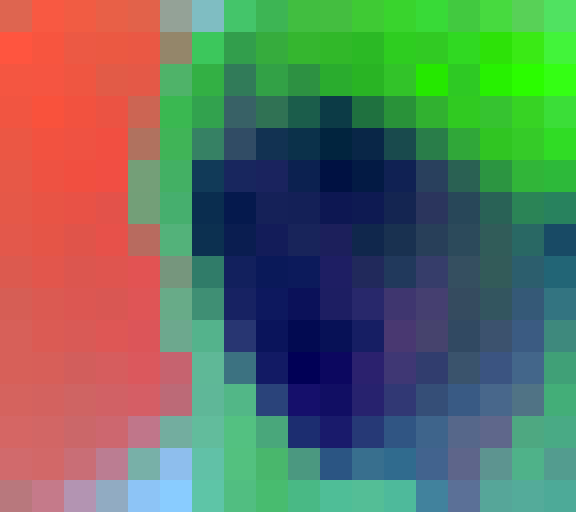

In [68]:
print(attn_map_path)
display(pca_img)

In [10]:
pca = PCA(n_components=3)

In [148]:
attn_map_value_path = "/home/yfyuan/YYF/Rerender/exp/attn_map/plug_up_cross_attn_output/"
# attn_map_value_path = "/home/yfyuan/YYF/Rerender/exp/attn_map/up_cross_attn_attn_map/"
attn_map_value_path = os.path.join(attn_map_value_path,"step-15_index-8.pt")
attn_map_value = torch.load(attn_map_value_path)
print(attn_map_value.shape)

torch.Size([1, 4608, 320])


In [149]:
self_attn_map_value = rearrange(attn_map_value, 'h n m -> n (h m)')
self_attn_map_value = self_attn_map_value.cpu().numpy()

In [150]:
%%capture
pca.fit(self_attn_map_value)

In [151]:
self_attn_map_value = pca.transform(self_attn_map_value)
self_attn_map_value = self_attn_map_value.reshape(1,-1,3)
b,n,f = self_attn_map_value.shape
print(n)

4608


In [152]:
if n == 288:
    d = 4
elif n == 1152:
    d = 2
else:
    d = 1
h = 64 // d
w = 72 // d
pca_img = self_attn_map_value.reshape(h,w,3)
pca_img_min = pca_img.min(axis=(0, 1))
pca_img_max = pca_img.max(axis=(0, 1))
pca_img = (pca_img - pca_img_min) / (pca_img_max - pca_img_min)
pca_img = Image.fromarray((pca_img * 255).astype(np.uint8))
pca_img = T.Resize(512, interpolation=T.InterpolationMode.NEAREST)(pca_img)

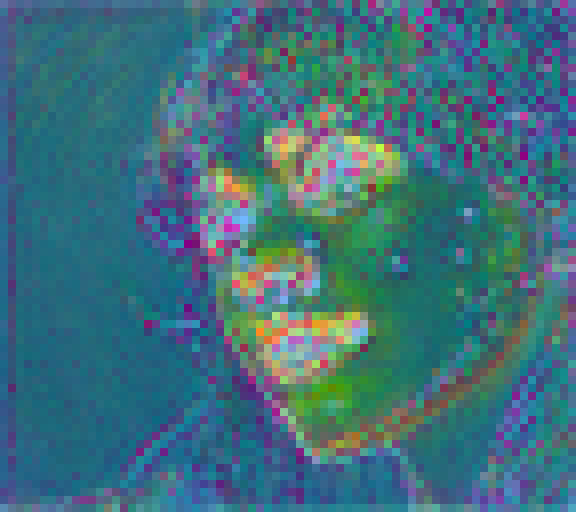

In [147]:
display(pca_img)

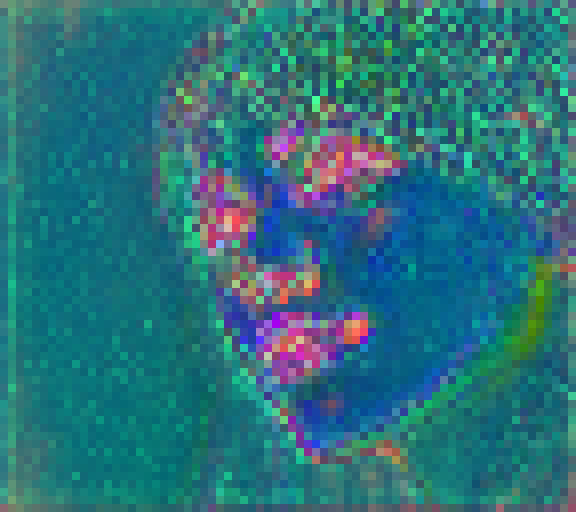

In [153]:
display(pca_img)